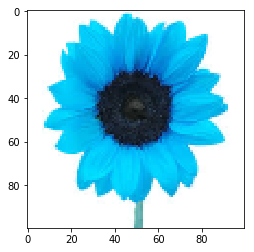

54


In [27]:
import numpy as np
import matplotlib.pylab as plt
import os
import cv2

DATADIR = "/Users/przemo06133/Documents/Python files/python_tf/PBL-flowers-python-tf/pbl_python_dataset/dataset/training"
CATEGORIES = ["daisy", "rose", "sunflower"]

# Move pictures into array
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        try:
            img_train_array = cv2.imread(os.path.join(path, img))
#             plt.imshow(img_array)
#             plt.xlabel("label: " + category)
#             plt.show()
        except Exception as e:
            pass

# resize all images as 100x100 px to keep all input layer the same
IMG_SIZE = 100
new_train_array = cv2.resize(img_train_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_train_array)
plt.show()

# trainig data with labels
training_data = []

for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_train_array = cv2.imread(os.path.join(path, img))
                new_train_array = cv2.resize(img_train_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_train_array, class_num])
            except Exception as e:
                pass

print(len(training_data))

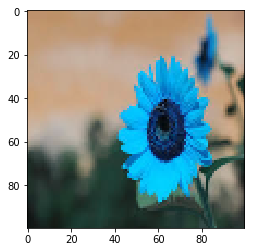

9


In [29]:
# the same for test data
DATADIR_TEST = "/Users/przemo06133/Documents/Python files/python_tf/PBL-flowers-python-tf/pbl_python_dataset/dataset/test"
for category in CATEGORIES:
    path = os.path.join(DATADIR_TEST, category)
    for img in os.listdir(path):
        try:
            img_train_array = cv2.imread(os.path.join(path, img))
#             plt.imshow(img_array)
#             plt.xlabel("label: " + category)
#             plt.show()
        except Exception as e:
            pass
        
IMG_SIZE = 100
new_array = cv2.resize(img_train_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

test_data = []

for category in CATEGORIES:
        path = os.path.join(DATADIR_TEST, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_test_array = cv2.imread(os.path.join(path, img))
                new_test_array = cv2.resize(img_test_array, (IMG_SIZE, IMG_SIZE))
                test_data.append([new_test_array, class_num])
            except Exception as e:
                pass

print(len(test_data))

In [33]:
# check data
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [39]:
# shuffle needed to avoid errors during traing
import random
random.shuffle(training_data)
random.shuffle(test_data)

for sample in training_data[:20]:
    print(sample[1])

1
1
2
1
1
2
0
1
1
0
2
2
0
1
1
0
2
2
2
0


In [40]:
# Split data and labels into traings and tests
x_training = [] # features
y_trainig = [] # labels

x_test = []
y_test = []

for features, label in training_data:
    x_training.append(features)
    y_trainig.append(label)
    
for f, l in test_data:
    x_test.append(f)
    y_test.append(l)

In [41]:
x_training = np.array(x_training).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [42]:
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [45]:
# save date in files
import pickle

pickle_training_out = open("x_training.pickle", "wb")
pickle.dump(x_training, pickle_training_out)
pickle_training_out.close()

pickle_training_out = open("y_training.pickle", "wb")
pickle.dump(y_trainig, pickle_training_out)
pickle_training_out.close()

In [44]:
pickle_test_out = open("x_test.pickle", "wb")
pickle.dump(x_test, pickle_test_out)
pickle_test_out.close()

pickle_test_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_test_out)
pickle_test_out.close()